In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Set up liabrary**

In [2]:
# Set up XG Boost
!pip install xgboost
# Set up imbalanced
!pip install imbalanced-learn
# Set up plotly
!pip install plotly
# Set up scikit learn
!pip install scikit-learn

# **Bring in  required library**

In [3]:
#this librery for dataa analysis and modification
import pandas as pds

#Using a librery for mamatical operations and handling multi-dimensional arrays.
import numpy as nup

# Adding a visualization creation library, particularly for static plot's and graphs.
import matplotlib.pyplot as pltx

# Bringing in a library to make more complex and visually appealing plot's and visualztions.
import seaborn as sbn

# Using Recursive Feature Elimination to pick features
from sklearn.feature_selection import RFE

#It is used to classification or regression teask
from sklearn.linear_model import LogisticRegression

# used for normalization data
from sklearn.preprocessing import StandardScaler

# Using Plotly Express, create interactive visualizations
import plotly.express as px

# using smote for data balance
from imblearn.over_sampling import SMOTE

# using splitting data in train and test
from sklearn.model_selection import train_test_split

# using for large dataset and accuracy performance
from sklearn.svm import SVC

# its is using for tree based approach for classification problem
from sklearn.ensemble import ExtraTreesClassifier

# bringing the model performance using k fold technique.
from sklearn.model_selection import KFold

# Evaluate  regression using MSE and R²
from sklearn.metrics import mean_squared_error, r2_score

# used for boosting model for classification.
from sklearn.ensemble import GradientBoostingClassifier

#calcultating the evalution matrics of model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# XGBoost classifier for optimal gradient boosting
from xgboost import XGBClassifier

# Stratified K Fold cross validations preserving label distribution
from sklearn.model_selection import StratifiedKFold, cross_val_score

# K-Nearest Neighbors classifier for instance-based learning
from sklearn.neighbors import KNeighborsClassifier

#Turning off pointless warning to improve  output relability and cleanliness
import warnings

# imprt necceraary for werring
warnings.filterwarnings('ignore')

# **Read data set**

In [4]:
healthcaredf = pds.read_csv('/content/drive/MyDrive/diabetes (1).csv')

# **Show Top five row of  dataset**


In [5]:
healthcaredf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Shape of dataset**


In [6]:
healthcaredf.shape

(768, 9)

# **Information of  dataset**

In [7]:
healthcaredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Data description**

In [8]:
healthcaredf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Check Null value**


In [9]:
healthcaredf.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# **Box plot before handle outliers**

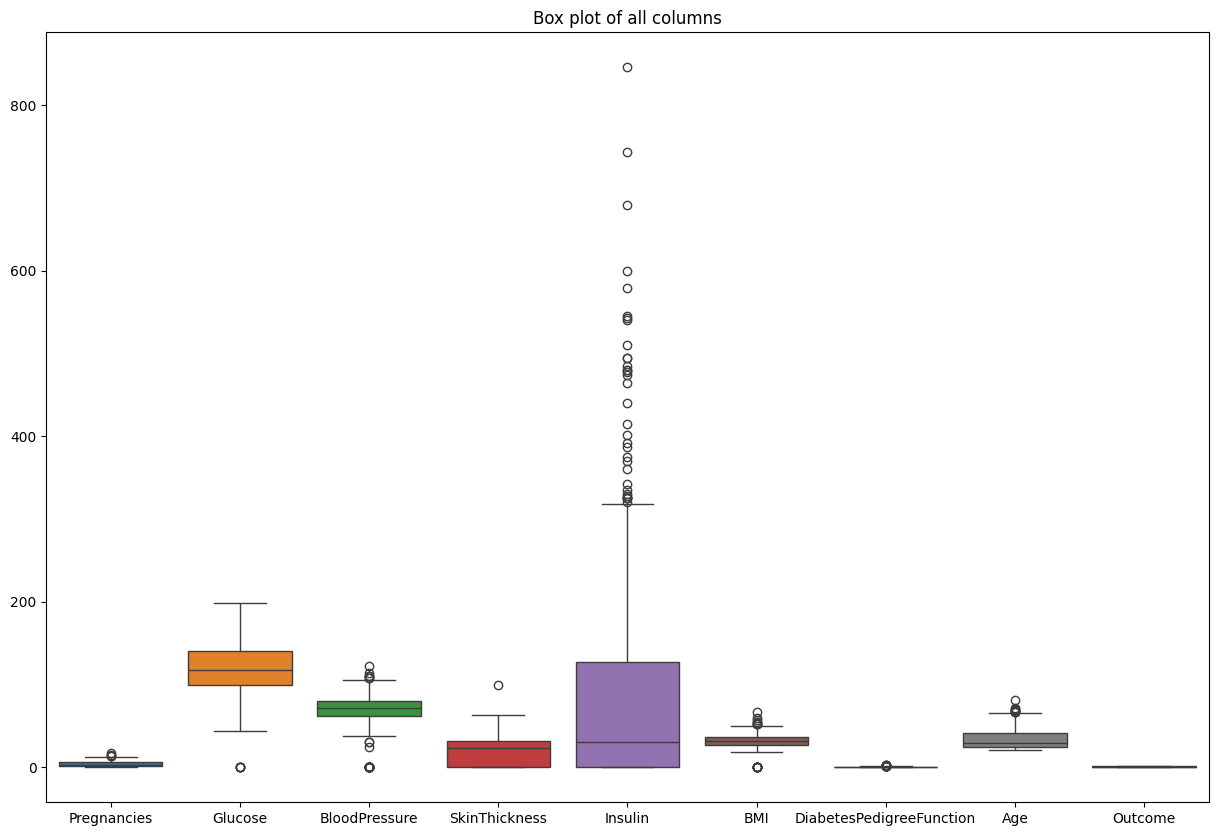

In [10]:
# Set  plot's figure size
pltx.figure(figsize=(15, 10))

# In  DataFrame, make box plots for every column.
sbn.boxplot(data=healthcaredf)

# Add a tittle to  boxplot
pltx.title("Box plot of all columns")

# present  box plott
pltx.show()

# **Box plot after handle outliers**

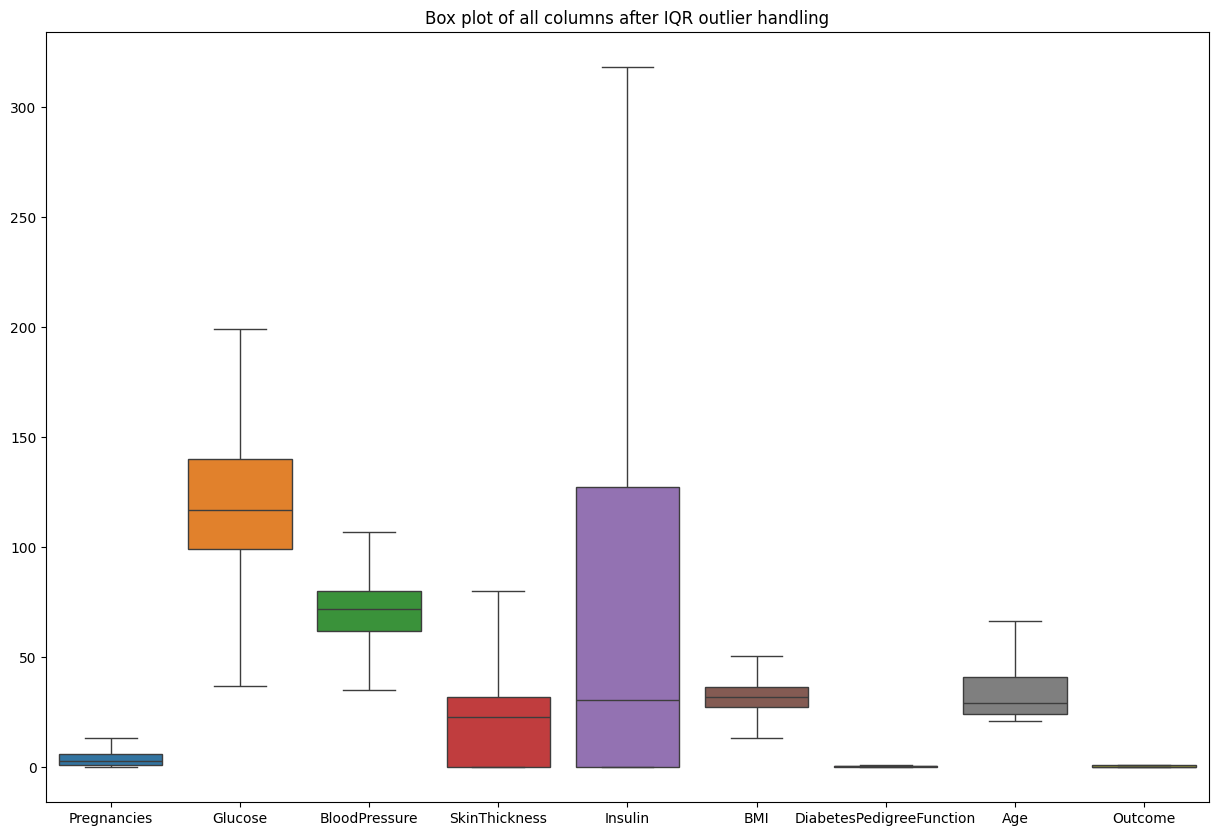

In [11]:
# Define a function to deal with outliers using the IQR approach.
def handle_outliers_iqr(df, column):
    # Compute  column's first quartile (Q1), third quartile (Q3), and interquartile range (IQR).
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

  # Determine the outliers' lowr and uper boundaries.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values below  lowr and uper bounds with  lowr and uper bounds, respectively.
    df[column] = nup.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = nup.where(df[column] > upper_bound, upper_bound, df[column])

    # Returrn modified DataFrame.
    return df

# Columns that should use IQR-based outlier management
columns_to_fill = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Use  IQR outlier management function for every column that is supplied.
for col in columns_to_fill:
    healthcaredf = handle_outliers_iqr(healthcaredf, col)

# Configure  box plot's figure size
pltx.figure(figsize=(15, 10))

# Compile box plots for every column using IQR outlier handling
sbn.boxplot(data=healthcaredf)

# Give  box plot a title
pltx.title("Box plot of all columns after IQR outlier handling")

# present  box plot
pltx.show()

# **KDE plots**

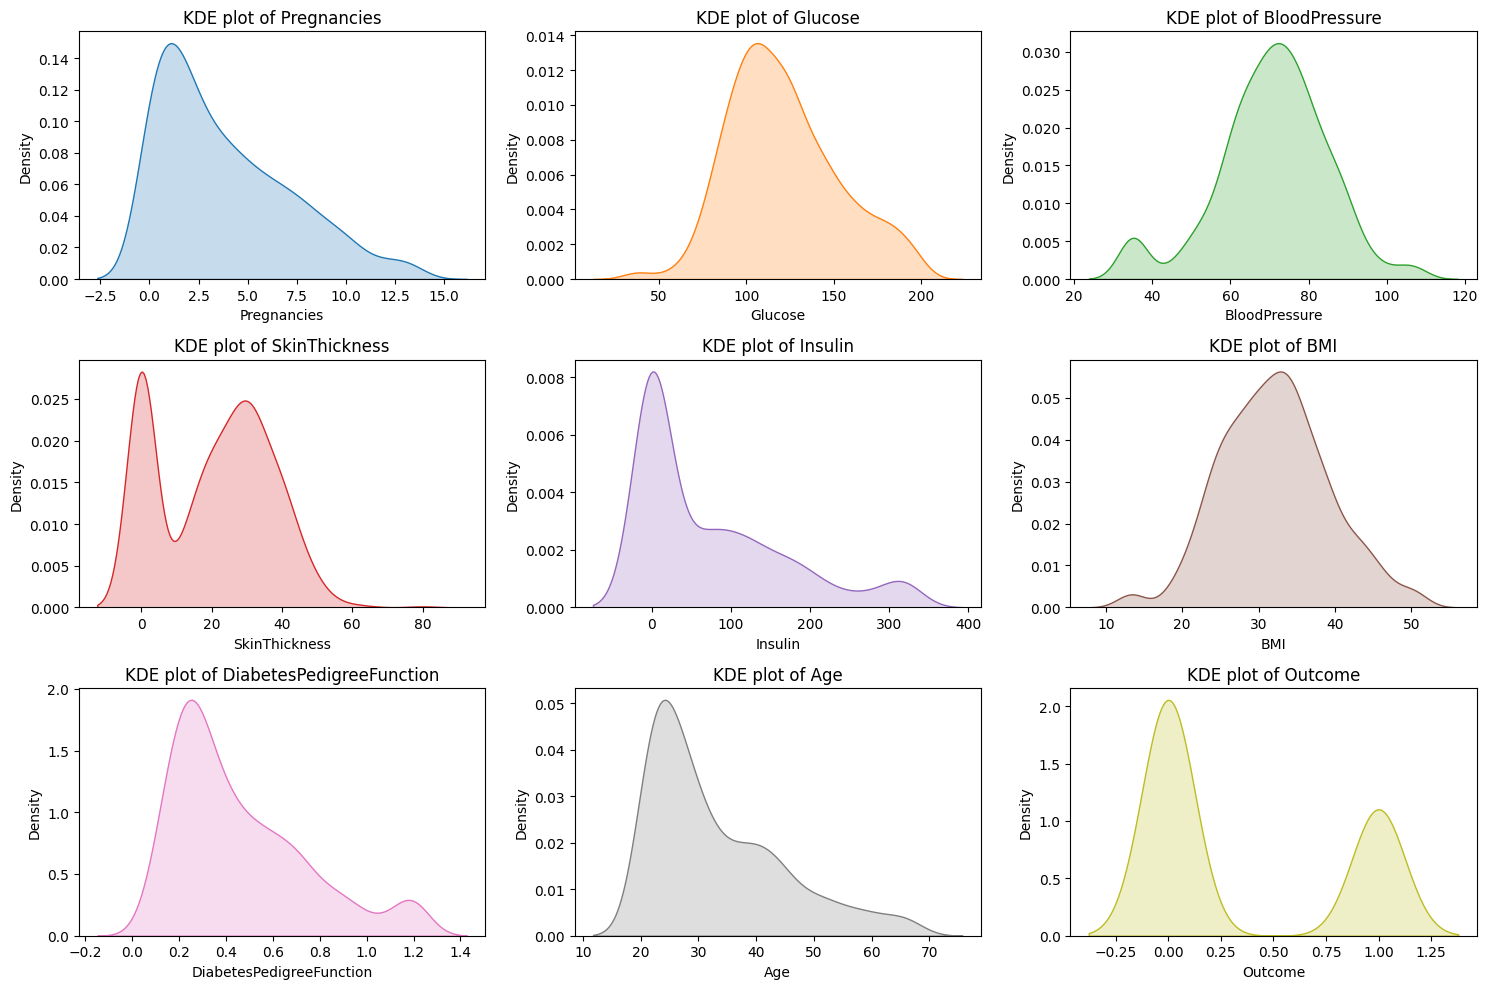

In [12]:
#  KDE plots' total figure size should be set.
pltx.figure(figsize=(15, 10))

# Create a color scheme that includes different hues for every column.
colors = sbn.color_palette("tab10", n_colors=len(healthcaredf.columns))

# Iterate over every column with  matching color.
for i, (col, color) in enumerate(zip(healthcaredf.columns, colors)):
    # For  current column, create a subplot.
    pltx.subplot(3, 3, i + 1)

    # Plot  Kernel Density Estimate (KDE) using  column's filled area.
    sbn.kdeplot(healthcaredf[col], fill=True, color=color)

    # Title  subplot with  column name.
    pltx.title(f"KDE plot of {col}")

# Modify  arrangement to avoid overlapping subplots.
pltx.tight_layout()

# present each and every KDE plot.
pltx.show()

# **Bar chart of age outcome**


In [13]:
# Make a bar chart using Plotly Express.
fig = px.bar(
    healthcaredf,
    x='Outcome',
    y='Age',

    # Establish  bar chart's title.
    title='Bar Chart of Age by Outcome',

    # Color  bars according to  'Outcome' category.
    color='Outcome',

    # Establish unique colors for each Outcome category.
    color_discrete_map={'Outcome1': 'blue', 'Outcome2': 'green'}  # Replace with actual Outcome values
)

# present  bar chart.
fig.show()


# **Histogram of age**

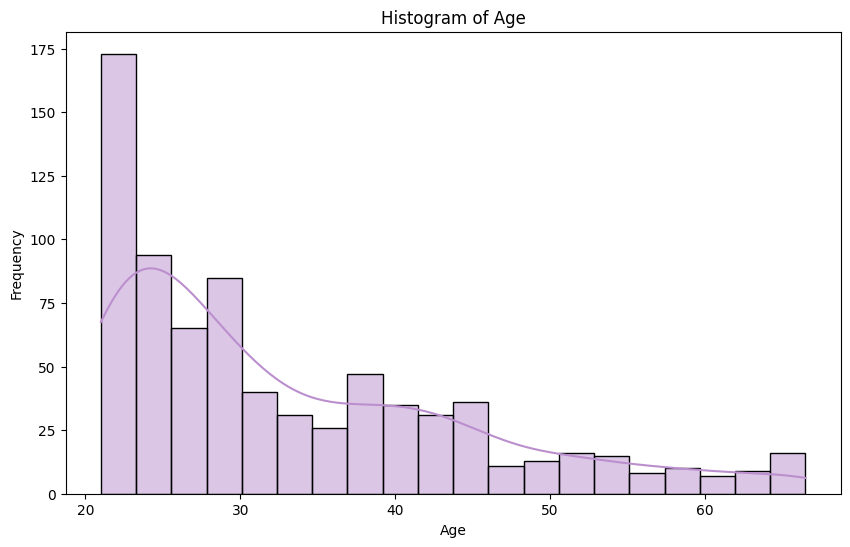

In [14]:
# Establish  histogram's fig size
pltx.figure(figsize=(10, 6))

# Make a histogram of  'Age' column with a KDE curve and 20 bins, using a custom color.
sbn.histplot(healthcaredf['Age'], bins=20, kde=True, color='#BB8FCE')

# Give  histogram a title
pltx.title('Histogram of Age')

# Labal  xaxis
pltx.xlabel('Age')

# Labal  yaxis 'Frequency'
pltx.ylabel('Frequency')

# Present  histogram.
pltx.show()


# **Correlation Heat Map**

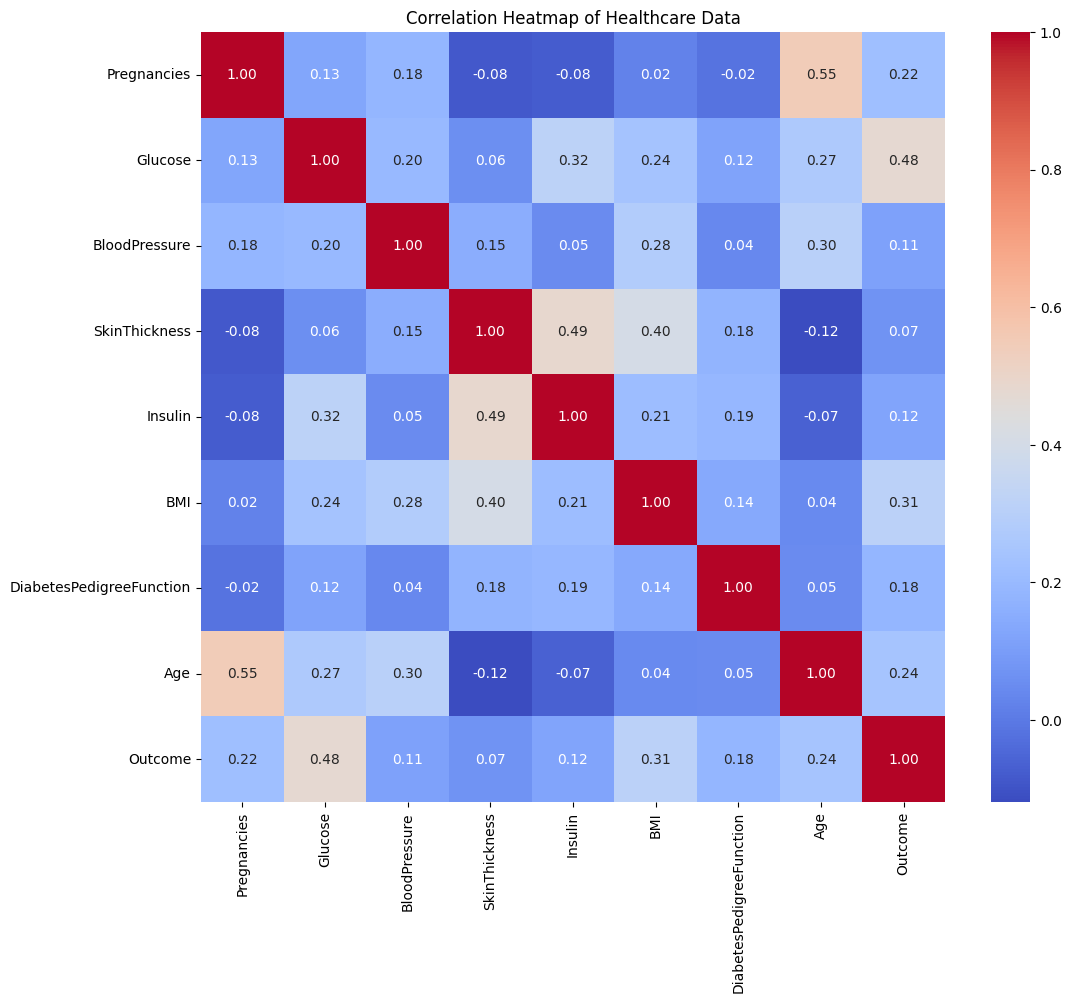

In [15]:
#  heatmap's figure size should be set.
pltx.figure(figsize=(12, 10))

# Make a corelation matrex heatmap using a "colwarm" color scheme with comments.
sbn.heatmap(healthcaredf.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Make  heattmap have a title.
pltx.title("Correlation Heatmap of Healthcare Data")

# Make  heattmap visible.
pltx.show()


# **Target variable**

In [16]:
# Keep  goal variable and features apart.
X = healthcaredf.drop('Outcome', axis=1)

# Make sure  target variable y has  'Outcome' column assigned.
y = healthcaredf['Outcome']


# **target variable balacing graph**

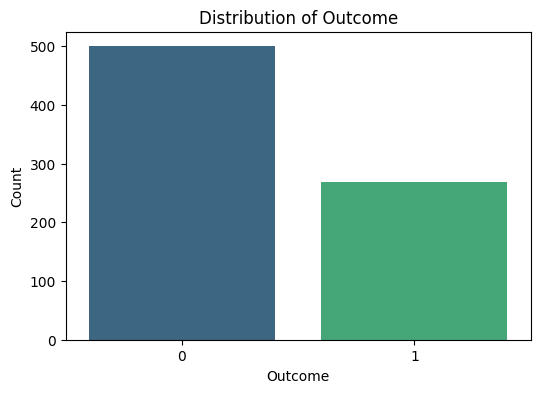

Distribution of Outcome:


,count
Outcome,
0,500
1,268


In [17]:
# Verify  target variable's distribution ('Outcome')
outcome_counts = healthcaredf['Outcome'].value_counts()

# Put  plot's figure size in place.
pltx.figure(figsize=(6, 4))

sbn.countplot(x='Outcome', data=healthcaredf, palette='viridis')

# Give  storyline a title.
pltx.title('Distribution of Outcome')

# Put 'Outcome' on  xaxis labal.
pltx.xlabel('Outcome')

# Put 'Count' on  yaxis.
pltx.ylabel('Count')

# Present  plott
pltx.show()

# Provide  target variable's numerical distribution in print form.
print("Distribution of Outcome:")
outcome_counts


# **Apply Smote**

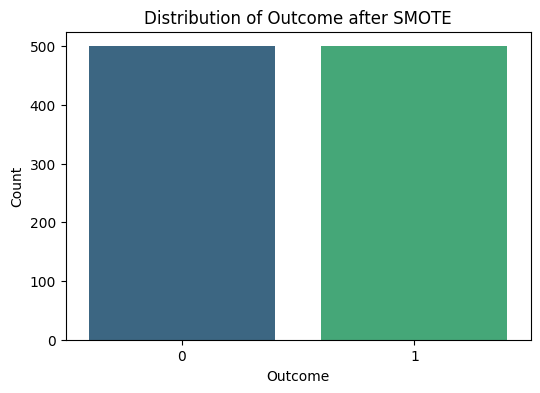

Distribution of Outcome after SMOTE:


,count
Outcome,
1,500
0,500


In [18]:
# To make  SMOTE object reproducible, define it with a fixed randomstate.
smote = SMOTE(random_state=42)

# Use SMOTE to resample the feature matrix X and target vector Y.
Xresamped, yresamped = smote.fit_resample(X, y)

# After resampling, count  instances of each class.
outcome_counts_resampled = yresamped.value_counts()

# Adjust  figure's size to make  plot easier to see.
pltx.figure(figsize=(6, 4))

# To see how  resampled target variable is distributed, make a count plot.
sbn.countplot(x=yresamped, palette='viridis')

# Give  count plot a title to provide context.
pltx.title('Distribution of Outcome after SMOTE')

# To identify  outcome categories, label  x-axis.
pltx.xlabel('Outcome')

# To show how many samples re are in each class, label  y-axis.
pltx.ylabel('Count')

# Show  finished plot.
pltx.show()

# Following  application of SMOTE, print  outcome classes' numerical distribution.
print("Distribution of Outcome after SMOTE:")
outcome_counts_resampled

# **Apply standard scaling**

In [19]:
# Normalize  feeture values by initializing  StandardSceler.
scaler = StandardScaler()

# To generate standardized values, fit  sceler to  resampled feature data.
Xscaled = scaler.fit_transform(Xresamped)

# Create a DataFrame using  scaled NumPy array and restore  original colum names.
Xscaleddf = pds.DataFrame(Xscaled, columns=Xresamped.columns)

#  output in  startinng few sceled feature rows, print a header.
print("Scaled Features (first 5 rows):")

# output  scaled feature DataFrame's initial five rows.
print(Xscaleddf.head())


Scaled Features (first 5 rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.602797  0.708596       0.077559       0.878603 -0.804276  0.123695   
1    -0.919059 -1.290573      -0.347615       0.503147 -0.804276 -0.913089   
2     1.211540  1.819245      -0.489340      -1.311556 -0.804276 -1.401859   
3    -0.919059 -1.163642      -0.347615       0.127691  0.157071 -0.690921   
4    -1.223431  0.359535      -2.190037       0.878603  0.913875  1.530759   

   DiabetesPedigreeFunction       Age  
0                  0.508457  1.424445  
1                 -0.455884 -0.271910  
2                  0.665686 -0.182629  
3                 -1.098777 -1.164729  
4                  2.510511 -0.093347  


# **Apply RFE for fearture selection**

In [20]:
# Set up  LogisticRegressionmodel, which will serve as  RFE estimator.
model = LogisticRegression()

# Use  estimator to create an RFE (Recursive Feature Elimination) object, n choose how many features to choose.
rfe = RFE(model, n_features_to_select=5)

# To determine  best features, fitt  RFE modal with  sceled and resampled datasett.
rfe.fit(Xscaleddf, yresamped)

# Get  feature names that RFE chose.
selectedfeatures = Xscaleddf.columns[rfe.support_]

# output  name of  chosen featurs.
print("Selected Features by RFE:")
print(selectedfeatures)

# output  whole featur rating, with rank 1 denoting that  feature was chosen.
print("\nFeature Ranking by RFE:")
print(dict(zip(Xscaleddf.columns, rfe.ranking_)))

# For model training and testing, creat a new dataset with just  chosen featurs.
Xselected = Xscaleddf[selectedfeatures]

# Show just  chosen characteristics in  dataset's first five rows.
print("\nData with Selected Features (first 5 rows):")
print(Xselected.head())


Selected Features by RFE:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')

Feature Ranking by RFE:
{'Pregnancies': np.int64(1), 'Glucose': np.int64(1), 'BloodPressure': np.int64(1), 'SkinThickness': np.int64(4), 'Insulin': np.int64(3), 'BMI': np.int64(1), 'DiabetesPedigreeFunction': np.int64(1), 'Age': np.int64(2)}

Data with Selected Features (first 5 rows):
   Pregnancies   Glucose  BloodPressure       BMI  DiabetesPedigreeFunction
0     0.602797  0.708596       0.077559  0.123695                  0.508457
1    -0.919059 -1.290573      -0.347615 -0.913089                 -0.455884
2     1.211540  1.819245      -0.489340 -1.401859                  0.665686
3    -0.919059 -1.163642      -0.347615 -0.690921                 -1.098777
4    -1.223431  0.359535      -2.190037  1.530759                  2.510511


# **Split**

In [21]:
# Use stratification to preserve  original clas distriibution.
Xtrainhealthcare, Xtesalthcare, ytrainhealthcare, ytesalthcare = train_test_split(
    Xselected, yresamped, test_size=0.3, random_state=42, stratify=yresamped
)

# determine  trainning featur set's shap.
print("Training features shape:", Xtrainhealthcare.shape)

# determine  testting featur set's shap.
print("Testing features shape:", Xtesalthcare.shape)

# determine  trainning targat labals' shap.
print("Training target shape:", ytrainhealthcare.shape)


Training features shape: (700, 5)
Testing features shape: (300, 5)
Training target shape: (700,)


# **gradiant boost model**

In [22]:
# Construct a Classifier using Gradient Enhancement
gbclf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=12)

# To guarantee that classes are dispersed equally across folds, use 5-fold stratified crossvalidation.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

# Conduct crossvalidation using acuracy as  criterion.
cvscoresgb = cross_val_score(gbclf, Xselected, yresamped, cv=skf, scoring='accuracy')

# determine  accuracy results for each of  five folds separately.
print("Cross validation Accuracy Scores for Gradient Boosting (5-fold):", cvscoresgb)

# Determine and publish  average accuracy for each fold.
print("Mean Cross validation Accuracy for Gradient Boosting:", nup.mean(cvscoresgb))

# Determine and output the accuracy standard deviation across folds.
print("Standard Deviation of Cross validation Accuracy for Gradient Boosting:", nup.std(cvscoresgb))

#  whole resampled and chosen featur dataset is used to train  GBModel.
gbclf.fit(Xselected, yresamped)

# Use  trained model to forecast  testt set's class labals.
ypredgb = gbclf.predict(Xtesalthcare)

# Determine how accurate  testt set's predictions were.
accuracygb = accuracy_score(ytesalthcare, ypredgb)

# output  test set's accuracy for  GB Modal.
print("\nAccuracy on Test Set with Gradient Boosting:", accuracygb)

Cross validation Accuracy Scores for Gradient Boosting (5-fold): [0.805 0.76  0.79  0.79  0.795]
Mean Cross validation Accuracy for Gradient Boosting: 0.788
Standard Deviation of Cross validation Accuracy for Gradient Boosting: 0.015033296378372923

Accuracy on Test Set with Gradient Boosting: 0.9766666666666667


# **testing result of gradient boost model**


Testing Results for Gradient Boosting Model:
----------------------------------------
Accuracy (%): 97.67
Precision (%): 98.64
Sensitivity (%): 96.67
Specificity (%): 98.67
F-Score (%): 97.64
Error Rate (%): 2.33

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.99      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



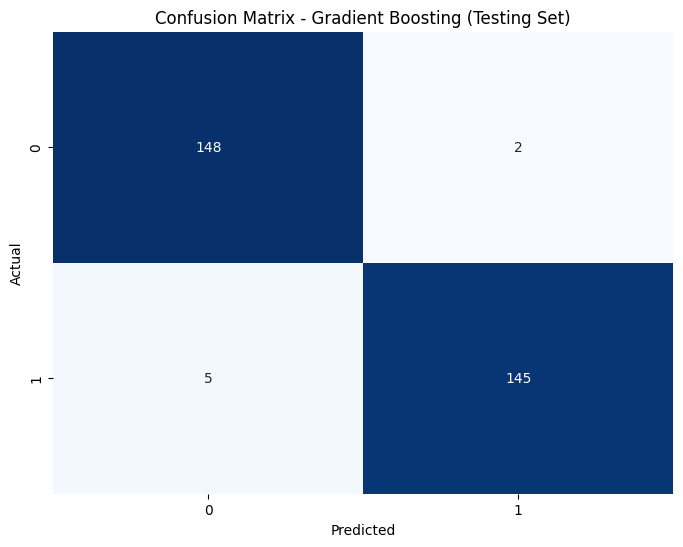

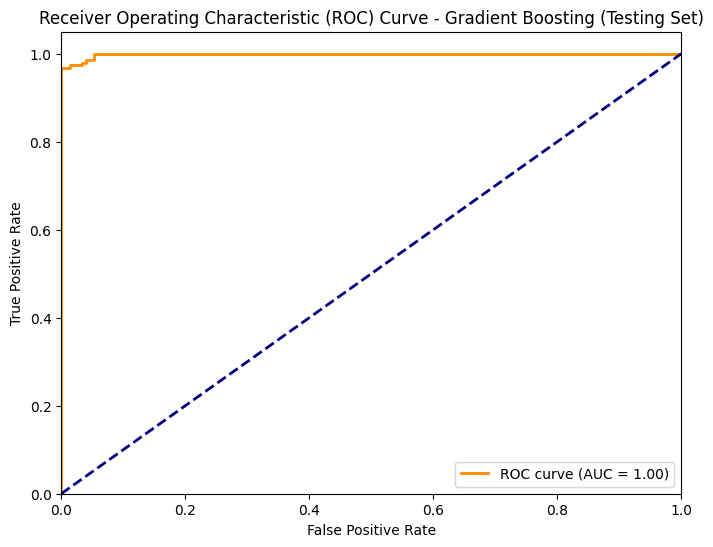

In [23]:
# Determine  test set's acuracy
testaccuracygb = accuracy_score(ytesalthcare, ypredgb)

# Determine its precesion
testprecisiongb = precision_score(ytesalthcare, ypredgb)

# Determine its recoll (sensitivity)
testrecallgb = recall_score(ytesalthcare, ypredgb)

# Determine its F1score
testf1gb = f1_score(ytesalthcare, ypredgb)

# Create  confuson matrx for  testt predictions
test_confmatrixgb = confusion_matrix(ytesalthcare, ypredgb)

# Determine  error rate by subtracting  accuracy from 1
test_error_rate_gb = 1 - testaccuracygb

# Print test results section header
print("\n" + "=" * 40)
print("Testing Results for Gradient Boosting Model:")
print("-" * 40)

# Show test accuracy in percentage
print(f"Accuracy (%): {testaccuracygb * 100:.2f}")

# Show testprecision in percentage
print(f"Precision (%): {testprecisiongb * 100:.2f}")

# Show testrecall (sensitivity) in percentage
print(f"Sensitivity (%): {testrecallgb * 100:.2f}")  # Sensitivity is  same as Recall

# Use the confuson matrx's values to determine specificity.
tn_test, fp_test, fn_test, tp_test = test_confmatrixgb.ravel()

# Determine specificity using false positives and true negatives
test_specificity_gb = tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else 0

# Show test specificity in percentage
print(f"Specificity (%): {test_specificity_gb * 100:.2f}")

# Show fault rate in percentage
print(f"F-Score (%): {testf1gb * 100:.2f}")
print(f"Error Rate (%): {test_error_rate_gb * 100:.2f}")

# Output a comprehensive clasification report including the F1 score, acuracy, and recall for each class.
print("\nClassification Report (Testing Set):")
print(classification_report(ytesalthcare, ypredgb))

# To aid with visual comprehension, print and plott  confuson matrx as a heattmap.
# Configure  confuson matrx plot's fig size
pltx.figure(figsize=(8, 6))

# Create  heatmap using Seaborn
sbn.heatmap(test_confmatrixgb, annot=True, fmt='d', cmap='Blues', cbar=False)

# Provide  plot's tittle and axis labals
pltx.title('Confusion Matrix - Gradient Boosting (Testing Set)')
pltx.xlabel('Predicted')
pltx.ylabel('Actual')

# Assign class names to  x-axis ticks
pltx.xticks(nup.arange(2) + 0.5, ['0', '1'])

# Assign class names to  y-axis ticks
pltx.yticks(nup.arange(2) + 0.5, ['0', '1'])

# output confusion matrix plot
pltx.show()

# ROC Curve (Set of Test Results)

# Retrieve expected probabilities from  model for  positiveclass
ytesalthcare_prob_gb = gbclf.predict_proba(Xtesalthcare)[:, 1]

# Determine  ROC criteria, truepositiverate, and falsepositiverate
fpr_test, tpr_test, thresholds_test = roc_curve(ytesalthcare, ytesalthcare_prob_gb)

# Calculate the AUC value, or area under the curve.
roc_auc_test = auc(fpr_test, tpr_test)

# Determine  ROC curve plot's fig size
pltx.figure(figsize=(8, 6))

# Plott  ROC crv using  AUCC valu in  labal
pltx.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')

# Plott  diagonal reference line.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Sett  Xaxis and Yaxis ranges
pltx.xlim([0.0, 1.0])
pltx.ylim([0.0, 1.05])

# Labal  Xaxis as  falsepositiverate and  Yaxis as  genuine positiverate
pltx.xlabel('False Positive Rate')
pltx.ylabel('True Positive Rate')

# Configure  ROC crv plott's tittle
pltx.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting (Testing Set)')

# Show  legend in  lowerrightcorner
pltx.legend(loc="lower right")

# present  ROC crv graphic
pltx.show()

# **XGBoost model**

In [24]:
# create  XGBost Clasifier.
xgbclf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42, use_label_encoder=False, eval_metric='logloss')

# To maintain class distribution in every fold, use a 5-fold stratified cross-validation.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

# Use  evaluation metric of accuracy to do cross-validation.
cv_scores_xgb = cross_val_score(xgbclf, Xselected, yresamped, cv=skf, scoring='accuracy')

#  acuracy ratings for each of  five crossvalidation folds should be printed.
print("Cross-validation Accuracy Scores for XGBoost (5-fold):", cv_scores_xgb)

# Determine  mean accuracy for each of  five folds and print it.
print("Mean Cross-validation Accuracy for XGBoost:", nup.mean(cv_scores_xgb))

# Determine and print  accuracy standard deviation across  folds.
print("Standard Deviation of Cross-validation Accuracy for XGBoost:", nup.std(cv_scores_xgb))

#  XGBoost model is trained using specific features on  entire resampled dataset.
xgbclf.fit(Xselected, yresamped)

# Apply  trained XGBoost model to  test set to predict class labels.
y_pred_xgb = xgbclf.predict(Xtesalthcare)

# Determine and report  test set's XGBoost model's accuracy.
accuracy_xgb = accuracy_score(ytesalthcare, y_pred_xgb)
print("\nAccuracy on Test Set with XGBoost:", accuracy_xgb)


Cross-validation Accuracy Scores for XGBoost (5-fold): [0.81  0.77  0.84  0.765 0.795]
Mean Cross-validation Accuracy for XGBoost: 0.796
Standard Deviation of Cross-validation Accuracy for XGBoost: 0.027459060435491952

Accuracy on Test Set with XGBoost: 0.9966666666666667


# **testing result of XG Boost model**


Testing Results for XGBoost Model:
----------------------------------------
Accuracy (%): 99.67
Precision (%): 100.00
Sensitivity (%): 99.33
Specificity (%): 100.00
F-Score (%): 99.67
Error Rate (%): 0.33

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       1.00      0.99      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



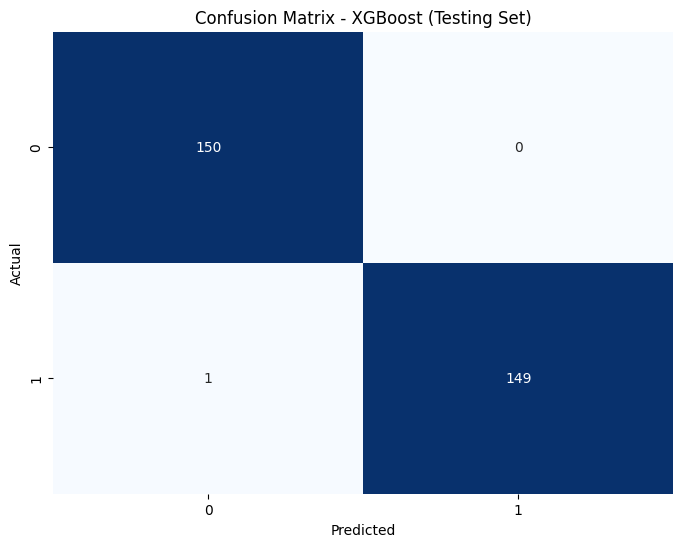

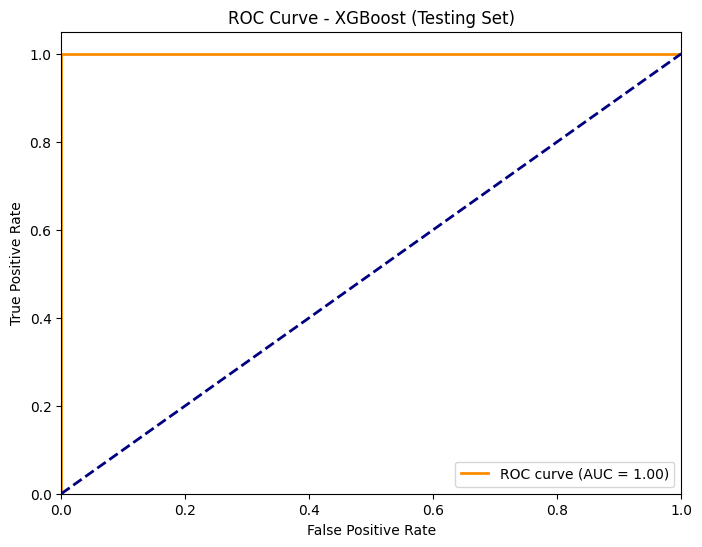

In [25]:
# Assess  results of  exam.
test_accuracy_xgb = accuracy_score(ytesalthcare, y_pred_xgb)  # Calculate  test set's accuracy.
test_precision_xgb = precision_score(ytesalthcare, y_pred_xgb)  # Compute  test set precision.
test_recall_xgb = recall_score(ytesalthcare, y_pred_xgb)  # Determine  test set's recall (sensitivity)
test_f1_xgb = f1_score(ytesalthcare, y_pred_xgb)  # Compute its F1-score
test_conf_matrix_xgb = confusion_matrix(ytesalthcare, y_pred_xgb)  # Create a confusion matrix for  test set predictions.
test_error_rate_xgb = 1 - test_accuracy_xgb  # Compute  error rate by subtracting  accuracy.

# Print test results with a separator and title
print("\n" + "=" * 40)
print("Testing Results for XGBoost Model:")
print("-" * 40)

# Show accuracy and precision as percentages
print(f"Accuracy (%): {test_accuracy_xgb * 100:.2f}")
print(f"Precision (%): {test_precision_xgb * 100:.2f}")

# Show recoll (sensitivity) as percentages
print(f"Sensitivity (%): {test_recall_xgb * 100:.2f}")

# Extract confusion matrix values to compute specificity
tn_test, fp_test, fn_test, tp_test = test_conf_matrix_xgb.ravel()

# Determine specificity for negative classes
test_specificity_xgb = tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else 0

# Return specificity as a percentage
print(f"Specificity (%): {test_specificity_xgb * 100:.2f}")

# Show F1-score as a percentage
print(f"F-Score (%): {test_f1_xgb * 100:.2f}")

# Show error rate as a %
print(f"Error Rate (%): {test_error_rate_xgb * 100:.2f}")

# Print  complete riport on clasification .
print("\nClassification Report (Testing Set):")
print(classification_report(ytesalthcare, y_pred_xgb))

# Plot and print  confuson matrex as a heatmap
pltx.figure(figsize=(8, 6))  # Adjust  confuson matrex's figure size
sbn.heatmap(test_conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)  # Create  confuson matrex using Seaborn Heatmap
pltx.title('Confusion Matrix - XGBoost (Testing Set)')  # Add  plott's tittle
pltx.xlabel('Predicted')  # Add xaxis labal
pltx.ylabel('Actual')  # Add yaxis labal
pltx.xticks(nup.arange(2) + 0.5, ['0', '1'])
pltx.yticks(nup.arange(2) + 0.5, ['0', '1'])
pltx.show()  # output of  confuson matrex graphic

# ROC Curve (Set of Test Results)
ytesalthcare_prob_xgb = xgbclf.predict_proba(Xtesalthcare)[:, 1]  # Obtain expected probability for positiveclass
fpr_test, tpr_test, thresholds_test = roc_curve(ytesalthcare, ytesalthcare_prob_xgb)  # Determine thresholds, falsepositiverate, and truepositiverate
roc_auc_test = auc(fpr_test, tpr_test)  # Determine AUC, or area under  ROC crv.

# Setting  ROC curve plot's fig size
pltx.figure(figsize=(8, 6))

# Plotting  ROC crv with  AUC labal
pltx.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')

# Plotting  diagonal line as a reference (random classifier)
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Setting  x and y axis limits
pltx.xlim([0.0, 1.0])
pltx.ylim([0.0, 1.05])

# Labeling  axes
pltx.xlabel('False Positive Rate')
pltx.ylabel('True Positive Rate')

# Setting  ROC curve plott's tittle
pltx.title('ROC Curve - XGBoost (Testing Set)')

# Displaying  legend
pltx.legend(loc="lower right")

# Displaying  ROC crv plott
pltx.show()


# **knn model**

In [26]:
# Use two neighbors to initialize  KNN classifier.
knn_clf = KNeighborsClassifier(n_neighbors=2)

# To guarantee a fair distribution of classes over five folds, create a StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use accuracy as  scoring criterion and conduct a 5-fold cross-validation cycle.
cv_scores_knn = cross_val_score(knn_clf, Xselected, yresamped, cv=skf, scoring='accuracy')

# Output  precise scores for every foldd.
print("Cross-validation Accuracy Scores for K-Nearest Neighbors (5-fold):", cv_scores_knn)

# Output  average precision during each of  five folds.
print("Mean Cross-validation Accuracy for K-Nearest Neighbors:", nup.mean(cv_scores_knn))

# Print  accuracy score standard deviation for each fold.
print("Standard Deviation of Cross-validation Accuracy for K-Nearest Neighbors:", nup.std(cv_scores_knn))

# Use all of  resampled data to train  KNN clasifier.
knn_clf.fit(Xselected, yresamped)

# Use the trained KNN model to predict the testt set's class labels..
y_pred_knn = knn_clf.predict(Xtesalthcare)

# Determine  test set's KNN model's acuracy.
accuracy_knn = accuracy_score(ytesalthcare, y_pred_knn)

# output  acuracy of  KNN modal's testt sett.
print("\nAccuracy on Test Set with K-Nearest Neighbors:", accuracy_knn)


Cross-validation Accuracy Scores for K-Nearest Neighbors (5-fold): [0.725 0.74  0.715 0.74  0.755]
Mean Cross-validation Accuracy for K-Nearest Neighbors: 0.735
Standard Deviation of Cross-validation Accuracy for K-Nearest Neighbors: 0.013784048752090234

Accuracy on Test Set with K-Nearest Neighbors: 0.9266666666666666


# **Testing result of KNN Model**


Testing Results for K-Nearest Neighbors Model:
----------------------------------------
Accuracy (%): 92.67
Precision (%): 100.00
Sensitivity (%): 85.33
Specificity (%): 100.00
F-Score (%): 92.09
Error Rate (%): 7.33

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       150
           1       1.00      0.85      0.92       150

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



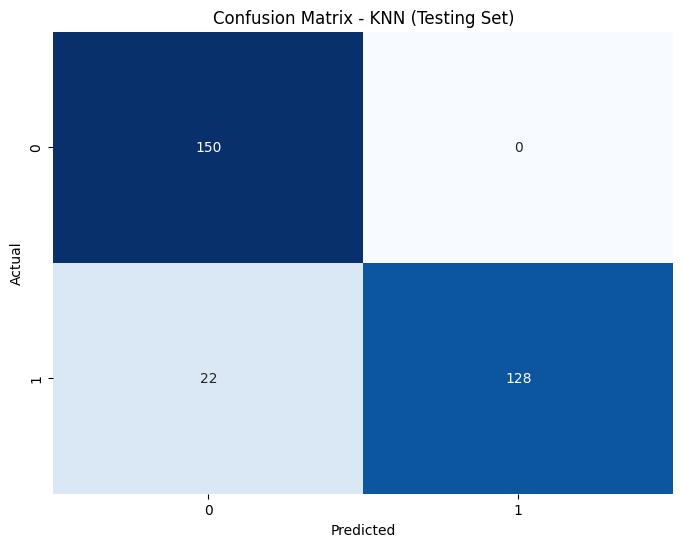

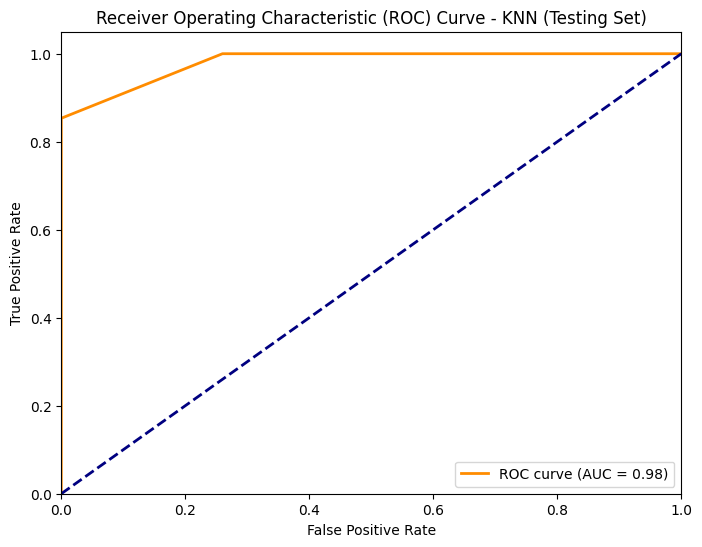

In [27]:
# Determine test set accuracy
test_accuracy_knn = accuracy_score(ytesalthcare, y_pred_knn)

# Determine testt sett precision
test_precision_knn = precision_score(ytesalthcare, y_pred_knn)

# Determine test set recoll (sensitivity)
test_recall_knn = recall_score(ytesalthcare, y_pred_knn)

# Determine test set F1score
test_f1_knn = f1_score(ytesalthcare, y_pred_knn)

# Create a confuson matrex using testt predictions
test_conf_matrix_knn = confusion_matrix(ytesalthcare, y_pred_knn)

# Determine error rate as 1 minus acuracy
test_error_rate_knn = 1 - test_accuracy_knn

# Print test results' section divider and tittle
print("\n" + "=" * 40)
print("Testing Results for K-Nearest Neighbors Model:")
print("-" * 40)

# output test accuracy and precision percentages
print(f"Accuracy (%): {test_accuracy_knn * 100:.2f}")
print(f"Precision (%): {test_precision_knn * 100:.2f}")

# determine test sensitivity (recall) percentages
print(f"Sensitivity (%): {test_recall_knn * 100:.2f}")

# Print  specificity in %,  F1-score in percentage,  mistake rate in percentage,
# and  specificity (true negative rate) for  test set after extracting values from  confusion matrix.
tn_test, fp_test, fn_test, tp_test = test_conf_matrix_knn.ravel()
test_specificity_knn = tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else 0
print(f"Specificity (%): {test_specificity_knn * 100:.2f}")
print(f"F-Score (%): {test_f1_knn * 100:.2f}")
print(f"Error Rate (%): {test_error_rate_knn * 100:.2f}")

# Print  whole classification report including support, F1-score, recall, and accuracy.
print("\nClassification Report (Testing Set):")
print(classification_report(ytesalthcare, y_pred_knn))

# Plot  confuson matrex as a heatmap after printing it.
# Configure  confusion matrix plot's figure size
pltx.figure(figsize=(8, 6))

# Use  confuson matrex values to create a heatmap.
sbn.heatmap(test_conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)

# should have a title.
pltx.title('Confusion Matrix - KNN (Testing Set)')

# Create a label for  confuson matrex's xaxis and yaxis.
pltx.xlabel('Predicted')
pltx.ylabel('Actual')

# Personalize x-tick labels
pltx.xticks(nup.arange(2) + 0.5, ['0', '1'])

# Personalize y-tick labels
pltx.yticks(nup.arange(2) + 0.5, ['0', '1'])

# Present  confuson matrex graphic.
pltx.show()

# ROC Curve (Set of Test Results)

# Obtain  model's estimations of  positiveclass's probability.
ytesalthcare_prob_knn = knn_clf.predict_proba(Xtesalthcare)[:, 1]

# Determine  ROC curve's thresholds and  falsepositive and truepositiverates.
fpr_test, tpr_test, thresholds_test = roc_curve(ytesalthcare, ytesalthcare_prob_knn)

# Determine AUC, or area under  ROC crv.
roc_auc_test = auc(fpr_test, tpr_test)

# Set  ROC plott's fig size
pltx.figure(figsize=(8, 6))

# Plott  ROC crv with  AUC labal
pltx.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')

# Plott  diagonal reference line (a random guess)
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Sett  x and yaxis limits
pltx.xlim([0.0, 1.0])
pltx.ylim([0.0, 1.05])

# Labal  x and yaxes of  ROC plott
pltx.xlabel('False Positive Rate')
pltx.ylabel('True Positive Rate')

# Give  ROC curve plott a tittle
pltx.title('Receiver Operating Characteristic (ROC) Curve - KNN (Testing Set)')

# Emphasize  ROC crv legend
pltx.legend(loc="lower right")

# output  ROC curve plott
pltx.show()

# **extra tree model**

Cross-validation Accuracy Scores for Extra Trees (5-fold): [0.795 0.76  0.81  0.785 0.81 ]
Mean Cross-validation Accuracy for Extra Trees: 0.792
Standard Deviation of Cross-validation Accuracy for Extra Trees: 0.01860107523773829

Accuracy on Test Set with Extra Trees: 0.95

Testing Results for Extra Trees Model:
----------------------------------------
Accuracy (%): 95.00
Precision (%): 95.92
Sensitivity (%): 94.00
Specificity (%): 96.00
F-Score (%): 94.95
Error Rate (%): 5.00

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       150
           1       0.96      0.94      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



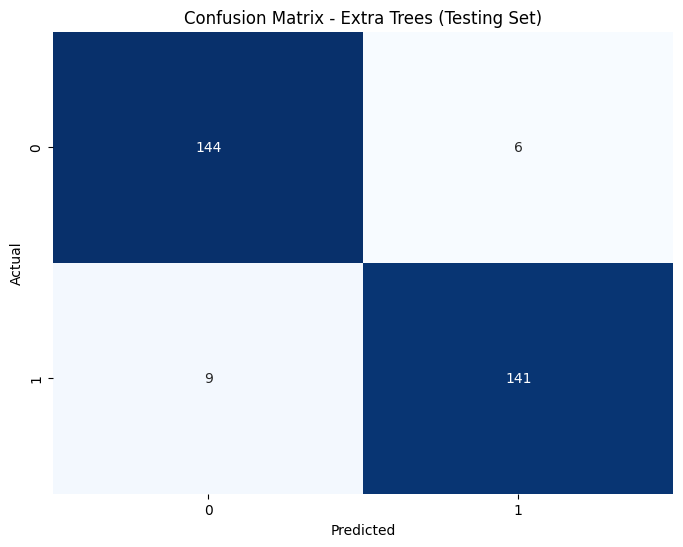

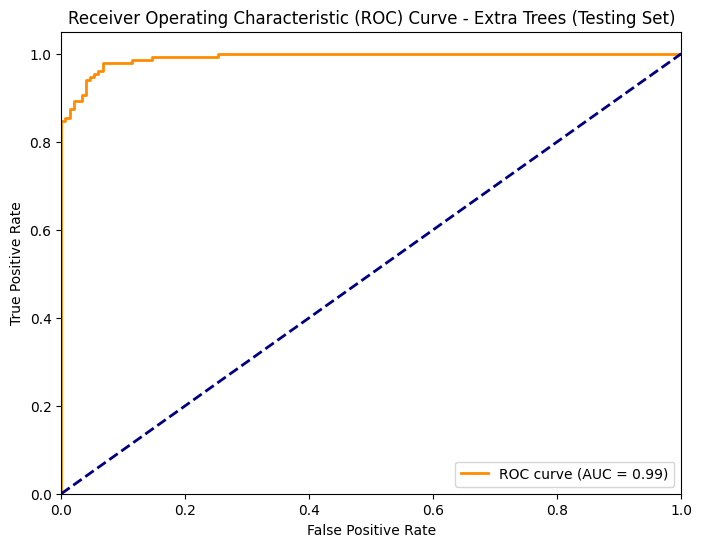

In [28]:
# Set  Extra Trees Classifier's initial hyperparameters
et_clf = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced'    # Manages class imbalance
)

# Initialize StratifiedKFold to guarantee that class distribution is maintained across five folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

# Use accuracy scoring to perform cross-validation on  chosen and balanced training data
cv_scores_et = cross_val_score(et_clf, Xselected, yresamped, cv=skf, scoring='accuracy')

# determine each fold's unique cross-validation accuracy scores
print("Cross-validation Accuracy Scores for Extra Trees (5-fold):", cv_scores_et)

# determine  crossvalidation acuracy mean
print("Mean Cross-validation Accuracy for Extra Trees:", nup.mean(cv_scores_et))

# To evaluate model performance variability, print  standard deviation
print("Standard Deviation of Cross-validation Accuracy for Extra Trees:", nup.std(cv_scores_et))

# Fit all of  trainning dataa to  Extra Trees modal (after feature selection and resampling)
et_clf.fit(Xselected, yresamped)

# Use  trainned modal to predict target labels on  testt sett
y_pred_et = et_clf.predict(Xtesalthcare)

# Calcullate  modal's accuracy using  testt sett
accuracy_et = accuracy_score(ytesalthcare, y_pred_et)
print("\nAccuracy on Test Set with Extra Trees:", accuracy_et)

# Create and save a test result header
print("\n" + "=" * 40)
print("Testing Results for Extra Trees Model:")
print("-" * 40)

# Determine and save testt sett acuracy
test_accuracy_et = accuracy_score(ytesalthcare, y_pred_et)

# Determine and save test set precision (positive predictive value)
test_precision_et = precision_score(ytesalthcare, y_pred_et)

# Determine and save test set recall (sensitivity)
test_recall_et = recall_score(ytesalthcare, y_pred_et)

# Determine and save F1-score (harmonic mean of precision and recall)
test_f1_et = f1_score(ytesalthcare, y_pred_et)

# Compute  confusion matrix to analyze predictions
test_conf_matrix_et = confusion_matrix(ytesalthcare, y_pred_et)

# Determine  test set error rate (1 - accuracy)
test_error_rate_et = 1 - test_accuracy_et

# output test acuracy as a percentage
print(f"Accuracy (%): {test_accuracy_et * 100:.2f}")

# output precision as a percentage
print(f"Precision (%): {test_precision_et * 100:.2f}")

# output sensitivity as a percentage (recall)
print(f"Sensitivity (%): {test_recall_et * 100:.2f}")

# TN, FP, FN, and TP are extracted from  confuson matrex
tn_test, fp_test, fn_test, tp_test = test_conf_matrix_et.ravel()

# Specificity (true negative rate) is calculated from TN and FP
test_specificity_et = tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else 0

# Specificity is printed as a percentage
print(f"Specificity (%): {test_specificity_et * 100:.2f}")

#  F1-score is printed as a percentage
print(f"F-Score (%): {test_f1_et * 100:.2f}")

# Display  total mistake rate as a percentage
print(f"Error Rate (%): {test_error_rate_et * 100:.2f}")

# Print a thorough classification report that includes  support number, precision, recall, and F1-score
print("\nClassification Report (Testing Set):")
print(classification_report(ytesalthcare, y_pred_et))

# For better visual comprehension, print  confusion matrix as a heatmap
# Adjust  confuson matrex plot size
pltx.figure(figsize=(8, 6))

# To display actual versus predicted classes, create a heatmap using Seaborn
sbn.heatmap(test_conf_matrix_et, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add a plott tittle
pltx.title('Confusion Matrix - Extra Trees (Testing Set)')

# Labal  xaxis as predicted labals
pltx.xlabel('Predicted')

# Labal  yaxis as acttual labals
pltx.ylabel('Actual')

# Sett xtick markings
pltx.xticks(nup.arange(2) + 0.5, ['0', '1'])
pltx.yticks(nup.arange(2) + 0.5, ['0', '1'])

# output the plott of the confuson matrex
pltx.show()

# Get  predicted probabilities for  positive class for  ROC curve
ytesalthcare_prob_et = et_clf.predict_proba(Xtesalthcare)[:, 1]

# Determine  false positive rate, true positive rate, and ROC thresholds
fpr_test, tpr_test, thresholds_test = roc_curve(ytesalthcare, ytesalthcare_prob_et)

# Determine  area under  curve, or AUC, using  ROC values
roc_auc_test = auc(fpr_test, tpr_test)

# Sett  plott size for  ROC curve
pltx.figure(figsize=(8, 6))

# Plott  ROC curve with  AUC label
pltx.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')

# Plott  diagonal baseline (no-skill model)
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Establish x-axis boundaries
pltx.xlim([0.0, 1.0])

# Establish y-axis constraints
pltx.ylim([0.0, 1.05])

# Labal  xaxis and  yaxis
pltx.xlabel('False Positive Rate')
pltx.ylabel('True Positive Rate')

# Include  ROC crv tittle
pltx.title('Receiver Operating Characteristic (ROC) Curve - Extra Trees (Testing Set)')

# Display  legend in  bottomrightcorner
pltx.legend(loc="lower right")

# Show  ROC crv
pltx.show()


Cross-validation Accuracy Scores for SVM (5-fold): [0.79  0.75  0.79  0.765 0.78 ]
Mean Cross-validation Accuracy for SVM: 0.775
Standard Deviation of Cross-validation Accuracy for SVM: 0.015491933384829683

Accuracy on Test Set with SVM: 0.8466666666666667

Testing Results for SVM Model:
----------------------------------------
Accuracy (%): 84.67
Precision (%): 83.33
Sensitivity (%): 86.67
Specificity (%): 82.67
F-Score (%): 84.97
Error Rate (%): 15.33

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.83      0.87      0.85       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



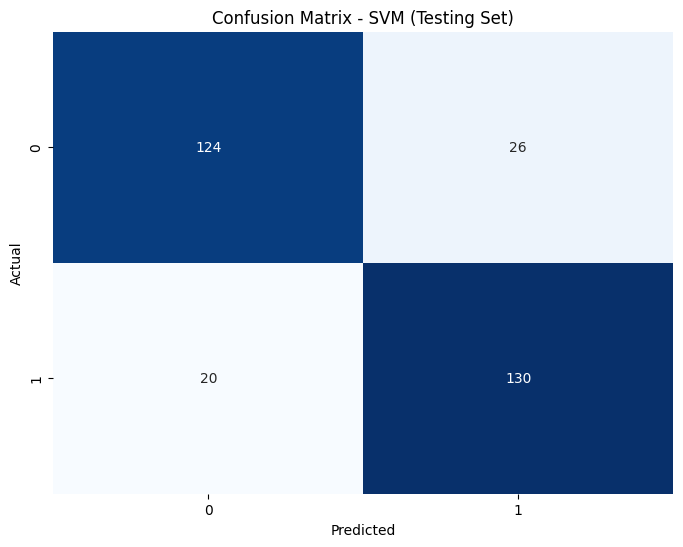

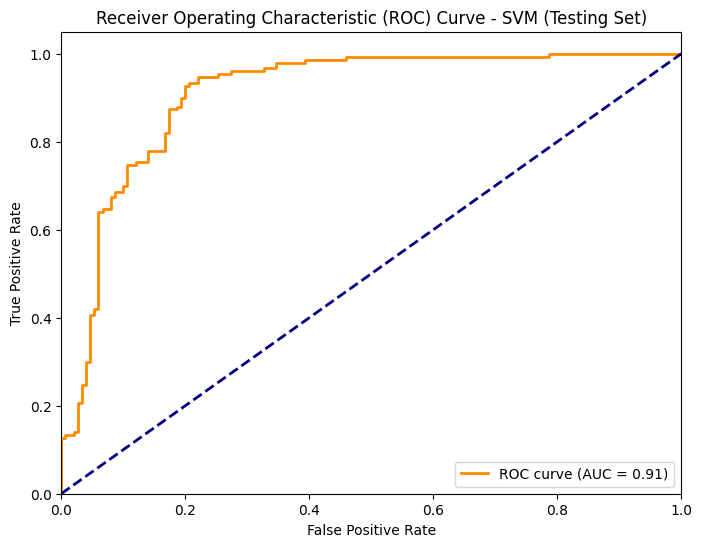

In [29]:
# Set  SVM clasifier's initial values to:
svm_clf = SVC(kernel='rbf', C=4.0, gamma='scale', random_state=42, probability=True)

# Set up StratifiedKFold to carry out 5-fold crossvalidation while preserving  distribution of classes.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

# Use accuracy in crossvalidation as  scoring metric.
cv_scores_svm = cross_val_score(svm_clf, Xselected, yresamped, cv=skf, scoring='accuracy')

# output acuracy score list for every foldd.
print("Cross-validation Accuracy Scores for SVM (5-fold):", cv_scores_svm)

# Output  average acuracy for each foldd.
print("Mean Cross-validation Accuracy for SVM:", nup.mean(cv_scores_svm))

# To assess consistency, print  acuracy standard deviation for each fold.
print("Standard Deviation of Cross-validation Accuracy for SVM:", nup.std(cv_scores_svm))

# Fit  whole training set (chosen and resampled) to  SVM clasifier.
svm_clf.fit(Xselected, yresamped)

# Use  training SVM model to predict labals for  testt sett.
y_pred_svm = svm_clf.predict(Xtesalthcare)

# Determine  SVM modal's acuracy on  testt sett and output  results.
accuracy_svm = accuracy_score(ytesalthcare, y_pred_svm)
print("\nAccuracy on Test Set with SVM:", accuracy_svm)

# Calculate  acuracy of  testt sett.
test_accuracy_svm = accuracy_score(ytesalthcare, y_pred_svm)

# Calculate  precision of  testt sett.
test_precision_svm = precision_score(ytesalthcare, y_pred_svm)

# Calculate  recoll (sensitivity) of  testt sett.
test_recall_svm = recall_score(ytesalthcare, y_pred_svm)

# Calculate  F1-score for  testt sett ( harmonic mean of recall and precision).
test_f1_svm = f1_score(ytesalthcare, y_pred_svm)

# Create a confusion matrix using  test results.
test_conf_matrix_svm = confusion_matrix(ytesalthcare, y_pred_svm)

# Determine  error rate as acuracy minus 1.
test_error_rate_svm = 1 - test_accuracy_svm

# determine  test results heading
print("\n" + "=" * 40)
print("Testing Results for SVM Model:")
print("-" * 40)

# determine  % correctness of  testt sett.
print(f"Accuracy (%): {test_accuracy_svm * 100:.2f}")

# Display precision as a percentage
print(f"Precision (%): {test_precision_svm * 100:.2f}")

# Print  proportion of recall and sensitivity.
print(f"Sensitivity (%): {test_recall_svm * 100:.2f}")  # Sensitivity is  same as Recall

# Take TN, FP, FN, and TP out of  confuson matrex.
tn_test, fp_test, fn_test, tp_test = test_conf_matrix_svm.ravel()

# Determine  genuine negative rate (specificity) using TN and FP.
test_specificity_svm = tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else 0

# Display specificity as a percentage.
print(f"Specificity (%): {test_specificity_svm * 100:.2f}")

# output  percentage of  F1-score.
print(f"F-Score (%): {test_f1_svm * 100:.2f}")

# output  % mistake rate.
print(f"Error Rate (%): {test_error_rate_svm * 100:.2f}")

# output  whole classification report for each class, including  f1-score, precision, recall, and support.
print("\nClassification Report (Testing Set):")
print(classification_report(ytesalthcare, y_pred_svm))

# To improve visualization, print  confusion matrix as a heatmap.
# Define  confusion matrix's plot size.
pltx.figure(figsize=(8, 6))

# Plot  heatmap using  expected and actual class labels.
sbn.heatmap(test_conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Assign  confusion matrix's plot title.
pltx.title('Confusion Matrix - SVM (Testing Set)')

# Indicate 'Predicted' on  x-axis.
pltx.xlabel('Predicted')

# Put 'Actual' on  y-axis label.
pltx.ylabel('Actual')

# Assign class 0 and 1 tick labels to  x-axis.
pltx.xticks(nup.arange(2) + 0.5, ['0', '1'])

# Assign class 0 and 1 tick labels to  y-axis.
pltx.yticks(nup.arange(2) + 0.5, ['0', '1'])

# Show  heatmap of  confusion matrix.
pltx.show()

# For ROC curve visualization, calculate  expected probabilities for  positive class.
ytesalthcare_prob_svm = svm_clf.predict_proba(Xtesalthcare)[:, 1]

# Determine  True Positive Rate, False Positive Rate, and probability-based criteria.
fpr_test, tpr_test, thresholds_test = roc_curve(ytesalthcare, ytesalthcare_prob_svm)

# Calcullate  AUC, or area under  ROC crv.
roc_auc_test = auc(fpr_test, tpr_test)

# Determine  ROC crv's plott size.
pltx.figure(figsize=(8, 6))

# Create a ROC curve plot and add an AUC annotation..
pltx.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')

# Plot  baseline, which is  diagonal line that shows  performance of  random guess.
pltx.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Assign  x-axis lower and upper boundaries.
pltx.xlim([0.0, 1.0])

# Establish  y-axis's loower and uper boundaries.
pltx.ylim([0.0, 1.05])

# Labal  ROC curve's xaxis
pltx.xlabel('False Positive Rate')

# Labal  ROC curve's yaxis
pltx.ylabel('True Positive Rate')

# Sett  ROC curve plot's title.
pltx.title('Receiver Operating Characteristic (ROC) Curve - SVM (Testing Set)')

# In  lowerrightcorner, show  legend.
pltx.legend(loc="lower right")

# Display  plott of  ROC crv.
pltx.show()


# **Comparison Graph of accuracy and Error**

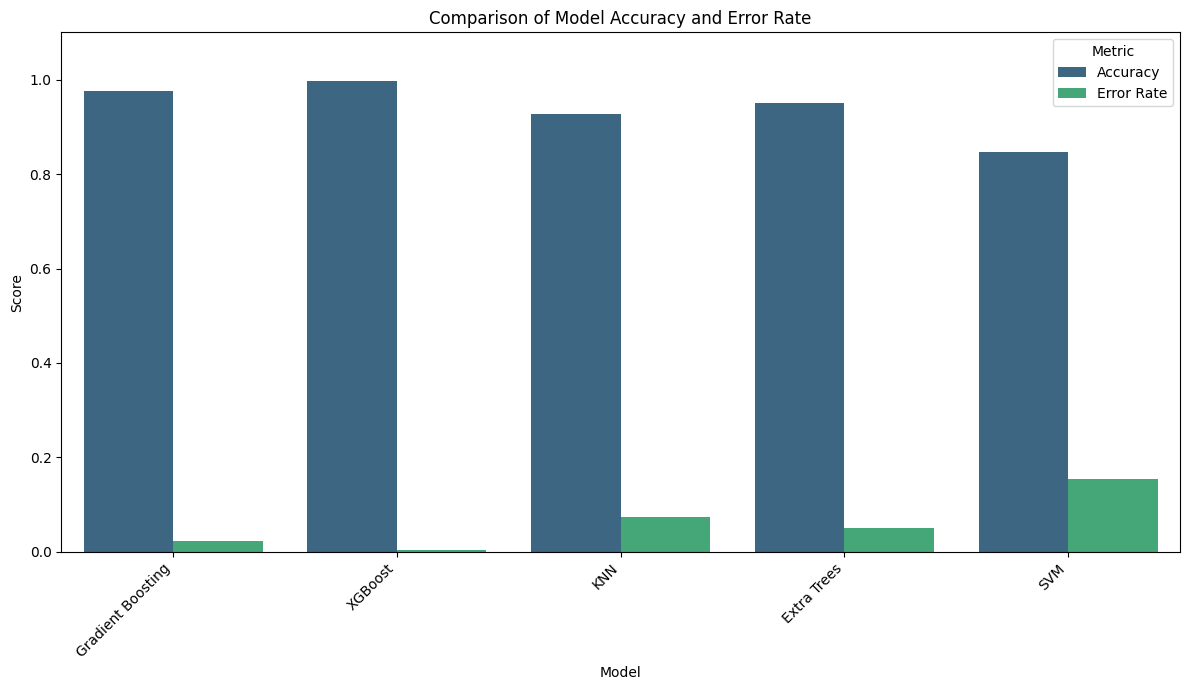

In [30]:
# In  comparison graph, define  list of model names that will be shown on  x-axis.
models = ['Gradient Boosting', 'XGBoost', 'KNN', 'Extra Trees', 'SVM']

# Establish accuracy scores for every model (based on test evaluation)
accuracy_scores = [testaccuracygb, test_accuracy_xgb, test_accuracy_knn, test_accuracy_et, test_accuracy_svm]

# Establish error rates for every model (1 - accuracy for each)
error_rates = [test_error_rate_gb, test_error_rate_xgb, test_error_rate_knn, test_error_rate_et, test_error_rate_svm]

# Arrange  model names, accuracy, and error rates in a DataFrame using pandas to facilitate charting.
comparison_df = pds.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Error Rate': error_rates
})

# To ensure compatibility with Seaborn, convert  DataFrame from wide to long format.
#  format that is produced has  following columns: Score, Model, and Metric (Accuracy/Error Rate).
comparison_melted = comparison_df.melt('Model', var_name='Metric', value_name='Score')

# Adjust  plot size to make it easier to understand and read.
pltx.figure(figsize=(12, 7))

# Apply a color scheme ("viridis") for visual clarity.
# Establish grouped bars for accuracy and error rate by model using Seaborn's barplot.
sbn.barplot(x='Model', y='Score', hue='Metric', data=comparison_melted, palette='viridis')

# For  bar plot, provide a title.
pltx.title('Comparison of Model Accuracy and Error Rate')

# Put 'Score' on  y-axis (because accuracy and mistake rate share  same row).
pltx.ylabel('Score')

# Assign y-axis boundaries between 0 and 1.1 to guarantee that all bars, including 100% or just above, are displayed.
pltx.ylim(0, 1.1)

# To improve visibility, gently rotate and align  x-axis labels.
pltx.xticks(rotation=45, ha='right')

# Modify  layout to ensure that  plot and labels fit properly and don't overlap.
pltx.tight_layout()

# Show  completed comparison bar chart.
pltx.show()


# **Comparison Graph of classification metrics by model**

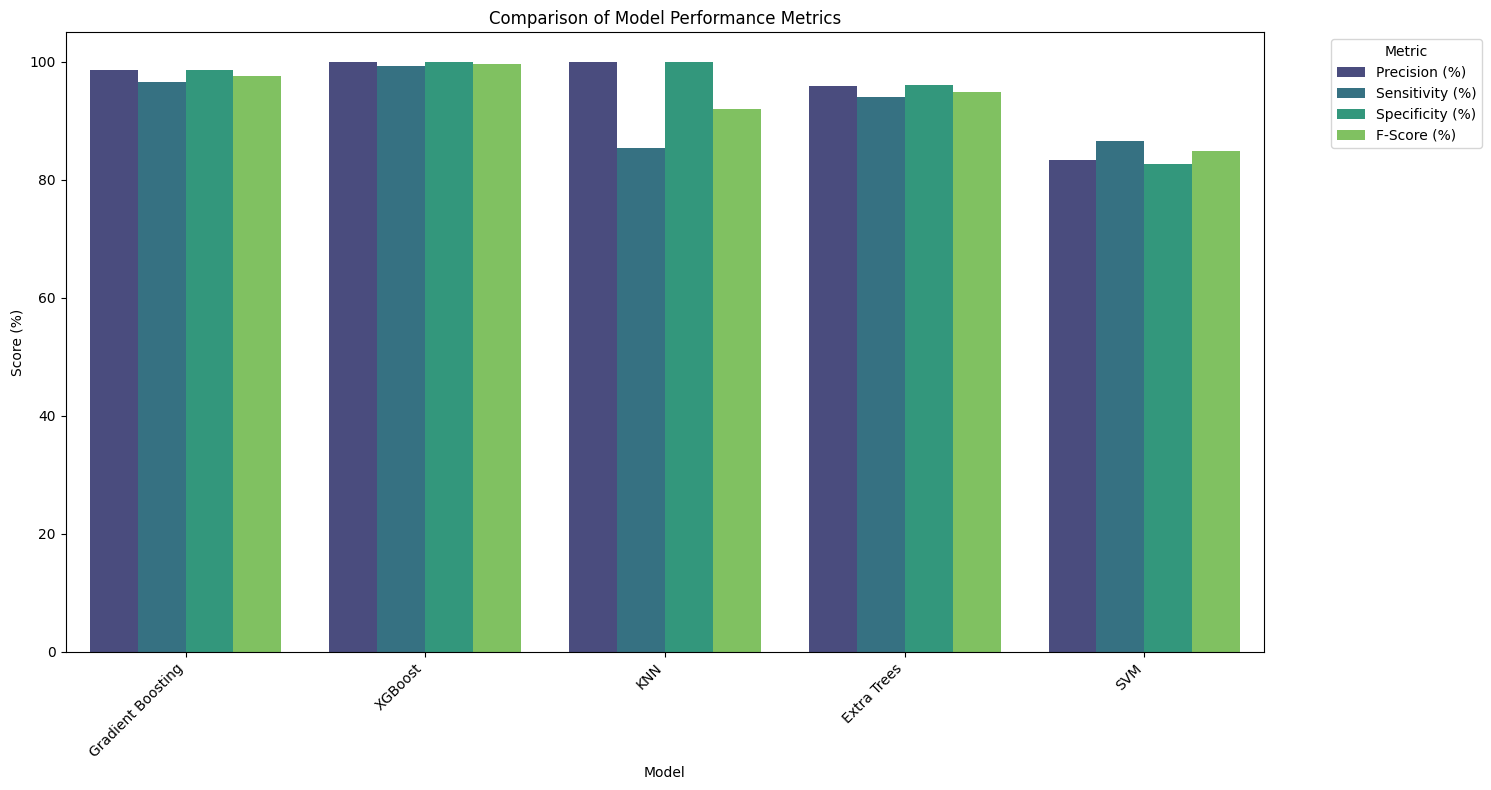

In [31]:
# Define precision scores (positive predictive value) for each model.
precision_scores = [testprecisiongb, test_precision_xgb, test_precision_knn, test_precision_et, test_precision_svm]

# Define model names for  comparison graph's x-axis.
models = ['Gradient Boosting', 'XGBoost', 'KNN', 'Extra Trees', 'SVM']

# Specify  sensitivity scores for each model (recall or true positive rate).
sensitivity_scores = [testrecallgb, test_recall_xgb, test_recall_knn, test_recall_et, test_recall_svm]

# List all models' specificity scores (also known as true negative rates).
specificity_scores = [test_specificity_gb, test_specificity_xgb, test_specificity_knn, test_specificity_et, test_specificity_svm]

# Establish  harmonic mean of precision and recall, or F1-scores, for every model.
f1_scores = [testf1gb, test_f1_xgb, test_f1_knn, test_f1_et, test_f1_svm]

# Make a DataFrame containing performance metrics and model names.
# For visualization, convert each metric score to a percentage.
comparison_df_full = pds.DataFrame({
    'Model': models,
    'Precision (%)': [score * 100 for score in precision_scores],
    'Sensitivity (%)': [score * 100 for score in sensitivity_scores],
    'Specificity (%)': [score * 100 for score in specificity_scores],
    'F-Score (%)': [score * 100 for score in f1_scores],
})

# Convert  DataFrame to long format so that it may be used with Seaborn barplots.
#  Model, Metric, and Score (%) columns will be present in  generated DataFrame.
comparison_melted_full = comparison_df_full.melt('Model', var_name='Metric', value_name='Score (%)')

# Adjust  plot size for clarity.
# Make use of  'viridis' color scheme.
pltx.figure(figsize=(15, 8))
sbn.barplot(x='Model', y='Score (%)', hue='Metric', data=comparison_melted_full, palette='viridis')

#  plot with a tittle that explains its purpose
pltx.title('Comparison of Model Performance Metrics')

# Labal  yaxis to indicate that  values are percentages
pltx.ylabel('Score (%)')

# Set  y-axis limit just above 100% to prevent bars from being cut off
pltx.ylim(0, 105)

# Rotate and align  x-axis labels for readability
pltx.xticks(rotation=45, ha='right')

# Place  legend outside  plot for improved visibility
pltx.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust  layout to prevent label overlap and ensure proper spacing
pltx.tight_layout()

# Finally, display  finished bar chart
pltx.show()
